In [3]:
import torch
import os
import os
from random import randint

import cv2
import nibabel
import nibabel as nib
import numpy as np
import torch
from matplotlib import animation
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import imageio
import os
from PIL import Image
from torchvision import transforms
import pandas as pd
import random
from scipy import ndimage
import mat73
import matplotlib.pyplot as plt

In [4]:
from mpl_toolkits import mplot3d

In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data"

In [7]:
list_dir = os.listdir(path)

In [8]:
# os.listdir()

In [9]:
root = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data"

In [10]:
p = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\Train\A00035072\sub-A00035072_ses-NFB3_T1w.nii.gz"

In [11]:
p1 = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data\BraTS2021_00112\BraTS2021_00112_t1.nii.gz"
p2 = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data\BraTS2021_00112\BraTS2021_00112_seg.nii.gz"

In [12]:
seg=nibabel.load(p2)
seg=seg.get_fdata()

In [13]:
seg.shape

(240, 240, 155)

In [14]:
image = nibabel.load(p1)
image=image.get_fdata()

In [15]:
image.shape

(240, 240, 155)

In [16]:
x = []
for i in range(image.shape[-1]):
    x.append(image[:,:,i].mean())

In [17]:
np.max(x)

173.04796875

In [18]:
np.mean(x)

87.74455745967742

In [19]:
y = []
for i in range(image.shape[0]):
    y.append(image[:, i, :].mean())

In [20]:
np.max(y)

203.4158064516129

In [21]:
np.mean(y)

87.74455745967742

In [22]:
j=0
for i in range(155):
    if image[:, :, i].max()>0 and seg[:, :, i].max()==0:
        j+=1
#     print(i)

In [23]:
j

72

In [24]:
# for i in range(0, 140):
#     slice = seg[:,:, 10+i] # extract the 8oth slice
#     print(slice.max()>0)
# #     plt.imshow(slice)
# #     plt.show()
#     print(i)

In [25]:
# for i in range(1, 140):
#     slice = seg[:,:, i] # extract the 8oth slice
#     plt.imshow(slice)
#     plt.show()
#     print(i)
    

In [26]:
"_seg.nii.gz"

'_seg.nii.gz'

In [27]:
seg.max() > 0

True

In [28]:
def zero_or_one(root):
    list_dir = os.listdir(root)
    for i in list_dir:
        if i == ".DS_Store":
            pass
        else:
            name = f"{i}_seg.nii.gz"
            path = os.path.join(root, i, name)
            seg=nibabel.load(path)
            seg=seg.get_fdata()
            print(seg.max() > 0)

In [29]:
# zero_or_one(root)

In [30]:
label = seg[None, ...]

In [31]:
label.shape

(1, 240, 240, 155)

In [32]:
ROOT_DIR = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data"

In [33]:
filenames = os.listdir(ROOT_DIR)
# filenames = list(map(lambda name: f"{ROOT_DIR}{name}/{name}", filenames))

In [34]:
# filenames

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(np.array([os.listdir(os.path.join(ROOT_DIR, filenames[i])) for i in range(len(filenames))]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_34608\1278136903.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = pd.DataFrame(np.array([os.listdir(os.path.join(ROOT_DIR, filenames[i])) for i in range(len(filenames))]))


In [37]:
l = []
k = []
m = []
for i in range(len(filenames)):
    sub = os.listdir(os.path.join(ROOT_DIR, filenames[i]))
    for j in range(len(sub)):
        x = sub[j].split("_")[-2]
        if x == "Healthy":
            l.append(f"{filenames[i]}/{sub[j]}")
        elif x == "Mask":
            m.append(f"{filenames[i]}/{sub[j]}")
        else:
            k.append(f"{filenames[i]}/{sub[j]}")
        

In [38]:
df =  pd.DataFrame(k)

In [39]:
root = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021"
df.to_csv(os.path.join(root, "Anomaly.txt"), index=False)

In [40]:
l[100].split("_")[-2]

'Healthy'

In [41]:
l[-10].split("_")[-2]

'Healthy'

In [42]:
# np.array([os.listdir(os.path.join(ROOT_DIR, filenames[i])) for i in range(len(filenames))])[0]

In [43]:
os.listdir(filenames[0])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'BraTS2021_00000'

In [44]:
filenames[0]

'BraTS2021_00000'

In [45]:
import torch
import os


In [88]:
class HnABRATS(torch.utils.data.Dataset):
    def __init__(self, ROOT_DIR):     
        
#         self.transform = transforms.Compose(
#             [transforms.ToPILImage(),
#              transforms.CenterCrop((175, 240)),           
#              transforms.Resize(img_size, transforms.InterpolationMode.BILINEAR),
#              # transforms.CenterCrop(256),
#              transforms.ToTensor(),
#              transforms.Normalize((0.5), (0.5))
#             ]
#         ) if not transform else transform
#         self.img_size = img_size
#         self.resized = resized      
        self.filenames = os.listdir(ROOT_DIR)
        self.filenames = list(map(lambda name: f"{ROOT_DIR}/{name}/{name}", self.filenames))
        
        if ".DS_Store" in self.filenames:
            self.filenames.remove(".DS_Store")
        self.ROOT_DIR = ROOT_DIR
        self.out_path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\Anomaly_dataset"
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        img_name1 = self.filenames[idx] + "_" + "flair" + ".nii.gz"
        img_name2 = self.filenames[idx] + "_" + "t1" + ".nii.gz"
        img_name3 = self.filenames[idx] + "_" + "t1ce" + ".nii.gz"
        img_name4 = self.filenames[idx] + "_" + "t2" + ".nii.gz"
        mask_name = self.filenames[idx] + "_" + "seg" + ".nii.gz"
        img1 = nib.load(img_name1)
        img2 = nib.load(img_name2)
        img3 = nib.load(img_name3)
        img4 = nib.load(img_name4)
        image1 = img1.get_fdata()
        image2 = img2.get_fdata()
        image3 = img3.get_fdata()
        image4 = img4.get_fdata()
        msk = nib.load(mask_name)
        mask = msk.get_fdata()
        image = np.stack([image1, image2, image3, image4])
#         print(image.shape)
        j= 0
        k= 0
        Hp = []
        An_path = []
        mas_path = []
        for i in range(mask.shape[0]):
            if image[:, i, :, :].max()>0 and mask[i, :, :].max()==0 :
                img = image[:, i, :, :]
                image_mean = np.mean(img)
                image_std = np.std(img)
                img_range = (image_mean - 1 * image_std, image_mean + 2 * image_std)
                img = np.clip(img, img_range[0], img_range[1])
                img = img / (img_range[1] - img_range[0])
                np.save(
                    os.path.join(f"{self.filenames[idx]}_4DHealthy_{j}.npy"), img.astype(
                        np.float32
                    )
                )
                Hp.append(f"{self.filenames[idx]}_4DHealthy_{j}.npy")
                j+=1
#             elif mask[i, :, :].max()>0 :
#                 img = image[:, i, :, :]
#                 image_mean = np.mean(img)
#                 image_std = np.std(img)
#                 img_range = (image_mean - 1 * image_std, image_mean + 2 * image_std)
#                 img = np.clip(img, img_range[0], img_range[1])
#                 img = img / (img_range[1] - img_range[0])
#                 mas = mask[i, :, :]
#                 np.save(
#                         os.path.join(f"{self.filenames[idx]}_4DAnno_{k}.npy"), img.astype(
#                                 np.float32
#                         )
#                 )
#                 An_path.append(f"{self.filenames[idx]}_4DAnno_{k}.npy")
#                 np.save(
#                         os.path.join(f"{self.filenames[idx]}_4DMask_{k}.npy"), mas.astype(
#                                 np.float32
#                         )
#                 )
#                 mas_path.append(f"{self.filenames[idx]}_4DMask_{k}.npy")
#                 k+=1
        return j, k, Hp, An_path, mas_path

    def __len__(self):
        return len(self.database)

In [89]:
dataset = HnABRATS(ROOT_DIR=r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data")

In [90]:
dataset.filenames[-1]

'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\brats2021\\traning_data/BraTS2021_01666/BraTS2021_01666'

In [91]:
from tqdm import tqdm 

In [92]:
Hp, Ap, Mp  = [], [], []
for eta in tqdm(dataset):
    Hp.append(eta[2])
    Ap.append(eta[3])
    Mp.append(eta[4])
#     print(eta[0], eta[1])

1251it [35:31,  1.70s/it]


In [95]:
# Hp

In [96]:
Hdf = list(filter(None, Hp))


In [98]:
HHdf = []
for i in Hdf:
    HHdf.extend(i)

In [99]:
len(HHdf)

96324

In [100]:
HHdf = pd.DataFrame(HHdf)


In [101]:
HHdf.to_csv(r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\4D_Healthy.txt", index=False)

In [69]:
Hdf = list(filter(None, Ap))
AAdf = []
for i in Hdf:
    AAdf.extend(i)

In [78]:
AAdf = pd.DataFrame(AAdf)

In [79]:
AAdf.to_csv(r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\4D_Anomaly.txt", index=False)

In [65]:
Mdf = list(filter(None, Mp))
MMdf = []
for i in Mp:
    MMdf.extend(i)

In [66]:
len(AAdf)

1935

In [81]:
MMdf = pd.DataFrame(MMdf)

In [82]:
MMdf.to_csv(r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\4D_Mask.txt", index=False)

In [68]:
pd.DataFrame(HHdf).to_csv("HHdf")
pd.DataFrame(HHdf).to_csv("HHdf")
pd.DataFrame(HHdf).to_csv("HHdf")

<module 'pandas' from 'C:\\Users\\Admin\\anaconda3\\envs\\en_2\\lib\\site-packages\\pandas\\__init__.py'>

In [114]:
J = []
K = []
M = []
for i in tqdm(dataset):
    J.append(i[0])
    K.append(i[1])
    M.append(i[-1])
#     print(i[0])

1251it [7:34:07, 21.78s/it]


In [120]:
J

[[0.11309089267876603,
  0.11356603606028166,
  0.11403466388271648,
  0.114488372363269,
  0.11492204701498013,
  0.11533693269403036,
  0.11573323705430058,
  0.11610017696708326,
  0.11643821449646166,
  0.11673887060778564,
  0.11700785113810654,
  0.11725008817841764,
  0.11746821000444704,
  0.11765906804864824,
  0.11782548070806281,
  0.1179668549584922,
  0.11808446594335759,
  0.11818095073263221,
  0.11824981089448225,
  0.11828598732875703,
  0.11828724429426553,
  0.11825517482653473,
  0.11819503133479681,
  0.11810707966704834,
  0.11799128089589576,
  0.11784726160456857,
  0.11768004822762476,
  0.11749013244196391,
  0.11727588228488318,
  0.11703569410726125,
  0.11677248902221654,
  0.11648574671169216,
  0.11617487160058655,
  0.11584272819085827,
  0.11549055939926552,
  0.11512212590705599,
  0.11473491371457539,
  0.11432995291885203,
  0.11390849605365339,
  0.11347482256433587,
  0.11302940218508355,
  0.11256832460421644,
  0.11209112335927941,
  0.1116013986

In [121]:
JA = []
for i in J:
    JA.extend(i)

In [144]:
np.max(JA)

0.1795690276658698

In [122]:
len(JA)

96324

In [163]:
co  =0
for i in KA :
    if i>=0.25:
        co+=1

In [164]:
co

1935

In [123]:
KA = []
for i in K:
    KA.extend(i)

In [139]:
co = 0
for i in KA :
    if i>=0.18:
        co+=1

In [140]:
co

45162

In [132]:
np.max(KA)

0.18000571317093192

In [124]:
len(KA)

74750

In [125]:
MA = []
for i in M:
    MA.extend(i)

In [126]:
len(MA)

74750

In [127]:
np.max(JA)

0.1795690276658698

In [130]:
np.mean(JA)

0.08445376108196778

In [131]:
np.mean(KA)

0.18000571317093192

In [129]:
np.max(MA)

0.4318279569892473

In [24]:
if K[1] == []:
    print("True")

True


In [25]:
df = []
for i in  K:
    if i == []:
        pass
    else:
        for j in i:
            df.append(j)

In [26]:
dm = []
for i in  M:
    if i == []:
        pass
    else:
        for j in i:
            dm.append(j)

In [27]:
import pandas as pd


In [28]:
# l =pd.DataFrame([1, 2, 3, 4,])

In [29]:
# l.to_csv("k")

In [30]:
p = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021"

In [31]:
dfa = pd.DataFrame(df)
dfm = pd.DataFrame(dm)

In [35]:
p1  = os.path.join(p, "5k_Anomaly.txt")
p2  = os.path.join(p, "5k_Mask.txt")

In [36]:
dfa.to_csv(p1, index=False)

In [37]:
dfm.to_csv(p2, index=False)

In [47]:
image[:,:, -1].max()>0

False

In [52]:
l=[]
for i in range(155):
    l.append(image[:, :, i].max()>0)    

In [38]:
l = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brats2021\traning_data\BraTS2021_01663/BraTS2021_01663+_Healthy_+76.npy"


In [48]:
l.split("/")[-1][:-4]

'BraTS2021_01663+_Healthy_+76'

In [73]:
image[:, :, 1].shape

(240, 240)

In [55]:
image.min()

0.0

In [56]:
image.mean()

87.74455745967742

In [57]:
u=[]
for i in range(155):
    u.append(image[:, :, i].sum())    

In [59]:
np.max(u)

9967563.0

In [60]:
np.mean(u)

5054086.509677419

In [65]:
len(image[-1][-1])

155

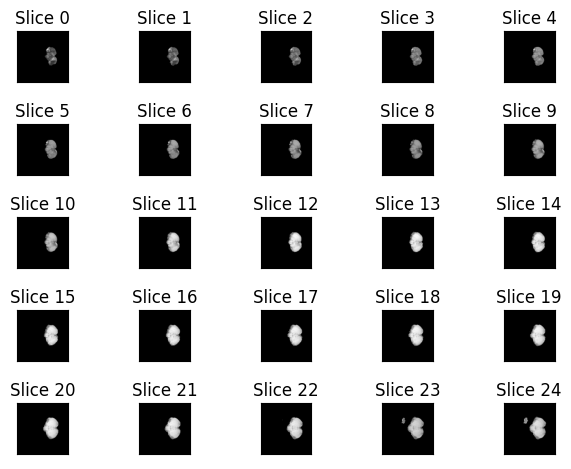

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 3D image with random data
# image = np.random.rand(50, 50, 50)

# Plot slices along the first and second axes
fig, axs = plt.subplots(nrows=5, ncols=5)
for i, ax in enumerate(axs.flat):
    ax.imshow(image[:,:,i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Slice {i}")
plt.tight_layout()
plt.show()

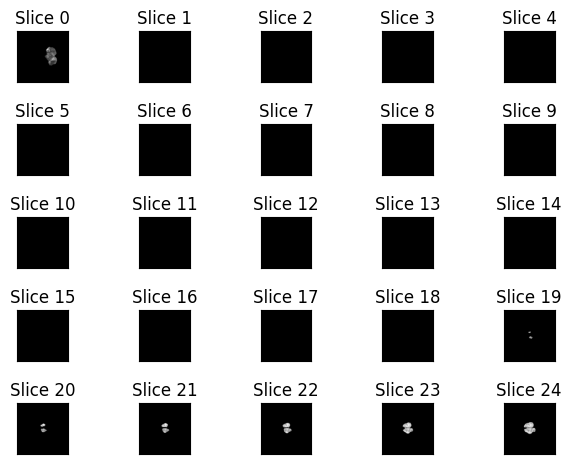

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 3D image with random data
# image = np.random.rand(50, 50, 50)

# Plot slices along the first and second axes
fig, axs = plt.subplots(nrows=5, ncols=5)
for i, ax in enumerate(axs.flat):
    ax.imshow(image[:,:,-i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Slice {i}")
plt.tight_layout()
plt.show()

In [67]:
x1 = torch.rand(1, 3, 448, 448)
x2 = torch.rand(1, 3, 448, 448)
x = torch.cat((x1, x2))

In [68]:
x.shape

torch.Size([2, 3, 448, 448])

In [69]:
theta = x.mean()

In [70]:
theta

tensor(0.4998)